In [183]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [184]:
vietnam = pd.read_excel(r"C:\Users\Phat\Downloads\Project\vietnam-gdp.xlsx")
china = pd.read_excel(r"C:\Users\Phat\Downloads\Project\china-gdp.xlsx")

# Value to million 

In [185]:
vietnam.head()

,Country or Area,Year,Value
0,Vietnam,2017,6.473684e+11
1,Vietnam,2016,5.953682e+11
2,Vietnam,2015,5.534918e+11
3,Vietnam,2014,5.132711e+11
4,Vietnam,2013,4.757544e+11


In [186]:
vietnam['Value']=vietnam['Value']/pow(10,9)
china['Value']=china['Value']/pow(10,9)

# Get rid of unnecessary columns

In [187]:
cpi.drop(['Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)

AttributeError: 'function' object has no attribute 'drop'

# Get Seaborn style

In [188]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [189]:
plt.style.use("seaborn-colorblind")

In [190]:
vietnam.tail()

,Country or Area,Year,Value
23,Vietnam,1994,95.842292
24,Vietnam,1993,86.223834
25,Vietnam,1992,77.929020
26,Vietnam,1991,70.128811
27,Vietnam,1990,64.051733


# Create NaN columns

In [197]:
vietnam["YearIncrease"]=np.nan
china["YearIncrease"]=np.nan


# Calculate % GDP growth compared to previous year

In [209]:
for i in range(0,27):
    vietnam.set_value(i,"YearIncrease",vietnam.iloc[i]["Value"]/vietnam.iloc[i+1]["Value"]-1)
    china.set_value(i,"YearIncrease",china.iloc[i]["Value"]/china.iloc[i+1]["Value"]-1)
vietnam["YearIncrease"]=vietnam["YearIncrease"]*100
china["YearIncrease"]=china["YearIncrease"]*100

C:\Users\Phat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Phat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


# Plotting and Decorating

<IPython.core.display.Javascript object>


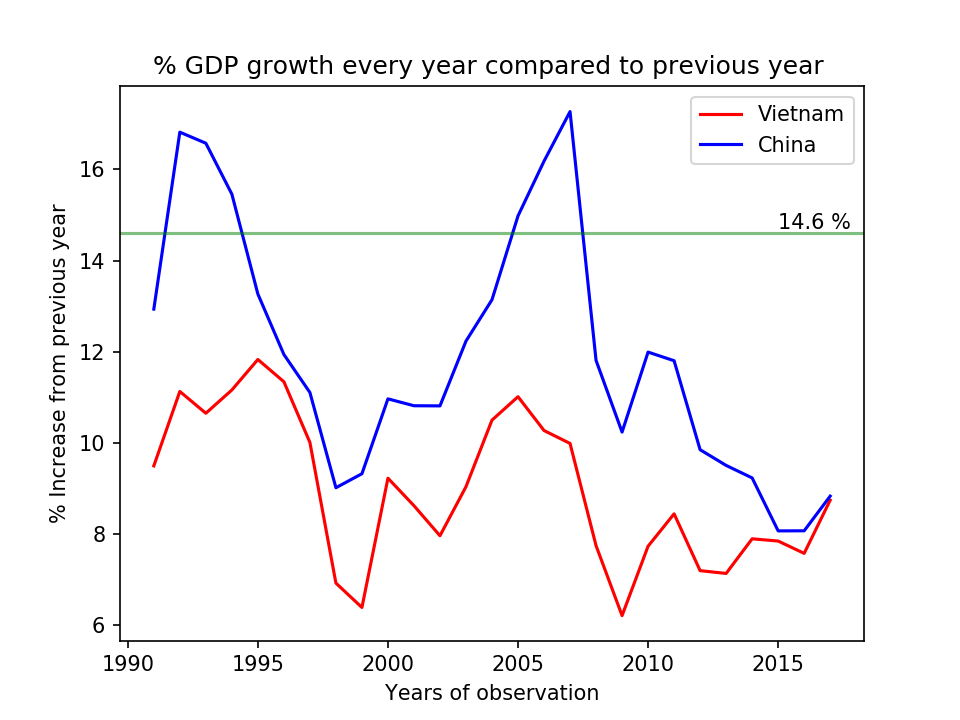

In [215]:
plt.figure()
plt.plot(vietnam['Year'],vietnam['YearIncrease'],color='red',label='Vietnam')
plt.plot(china['Year'],china['YearIncrease'],color='blue',label='China')
plt.ylabel('% Increase from previous year')
plt.xlabel('Years of observation')
plt.title('% GDP growth every year compared to previous year ')
plt.legend()

# Animation

In [232]:
import matplotlib.animation as animation
def onclick(event):
    plt.cla()
    line_data=event.ydata
    plt.plot(vietnam['Year'],vietnam['YearIncrease'],color='red',label='Vietnam')
    plt.plot(china['Year'],china['YearIncrease'],color='blue',label='China')
    plt.ylabel('% Increase from previous year')
    plt.xlabel('Years of observation')
    plt.title('% GDP growth every year compared to previous year ')
    plt.annotate("{} %".format(round(line_data,2)),[2015,event.ydata+0.1])
    plt.legend()
    line=plt.axhline(line_data,color='green',alpha=0.5)
plt.gcf().canvas.mpl_connect("button_press_event",onclick)

17